### Notation

Denote initial call option price as $C_0$ and $S_t$ as the price of the underlying asset for $t \in [0, T]$.

Given some underlying asset $S_t$ 

## Option Pricing Models

### 1. Black-Scholes-Merton model

The underlying stock price $S_t$ follows a geometric Brownian motion:

$$S_t = S_0 \exp\left(\left(r - \frac{1}{2}\sigma^2\right)t + \sigma W_t\right)$$

where $W_t$ is a $\mathbb{Q}$-Brownian motion, $r$ is the risk-free rate, and $\sigma$ is the volatility of the stock. 
The price of a European call option is given by:

$$C_0 = S_0 N(d_1) - K e^{-rT} N(d_2)$$

where $N$ is the CDF of the standard normal distribution, $S_0$ is the initial stock price, $T$ is the time to maturity, and $K$ is the strike price.
The $d_1$ and $d_2$ terms are defined as:
$$d_1 = \frac{\log(S_0/K) + (r + \sigma^2/2)T}{\sigma \sqrt{T}}, \quad d_2 = d_1 - \sigma \sqrt{T}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft
from scipy.integrate import quad
from scipy.stats import gamma
from scipy.stats import norm


class GBM:
    """
    Initialise the GBM model

    Parameters
    ----------
    S0 : float
        Initial stock price
    r : float
        Risk-free interest rate
    sigma : float
        Volatility of the stock price process
    T : float
        Time horizon
    N : int
        Number of subintervals for sample path
    """
    def __init__(self, S0, r, sigma, T, N):
        self.S0 = S0
        self.r = r
        self.sigma = sigma
        self.T = T
        self.N = N
    
    def phi(self, t, u):
        """Evaluates the characteristic function of log(St), where St is the
        stock price given by a Geometric Brownian motion.

        Parameters
        ----------
        t : array_like(float, ndim=1)
            Time of log-stock price for charateristic function to be computed;
            usually the maturity of the call option.

        u : array_like(float, ndim=1)
            Value at which the characteristic function of log(St) is to be
            computed.

        Returns
        -------
        phi_t(u) : array_like(float, ndim=1)
            Value of characteristic function of log(St) computed at u. 
        """
        S0, r, sigma = self.S0, self.r, self.sigma
        mu = np.log(S0) + (r - 0.5*sigma**2)*t
        var = t*sigma**2
        return np.exp(1j*u*mu  - 0.5*u**2*var)
    

    def sample_path(self, T, N=200, plot=False):
        """Generate a sample path of Geometric Brownian motion and return
        the terminal stock price.

        Parameters
        ----------
        T : float
            Terminal time of stock process.
        
        N : int
            Number of subintervals to use when generating sample path.
        
        plot : bool, optional
            If true, plots and displays the generated sample path.

        Returns
        -------
        ST : float
            The simulated value of the terminal stock price at time T.
        """
        dt = self.T / self.N
        t = np.linspace(0, T, N + 1)
        dW = np.random.normal(0, np.sqrt(dt), N)
        W = np.insert(np.cumsum(dW), 0, 0)  

        S0, r, sigma = self.S0, self.r, self.sigma
        S_sim = S0 * np.exp((r - 0.5*sigma**2)*t + sigma*W)
        if plot:
            plt.plot(t, S_sim)
            plt.show()
        return S_sim[-1]

### 2. Variance Gamma model


In [3]:
K = 140
S0, r, sigma, T, N = 100, 0.05, 0.2, 1, 200
sigma, nu, theta = 0.25, 2, -0.1
S = GBM(S0, r, sigma, T, N)

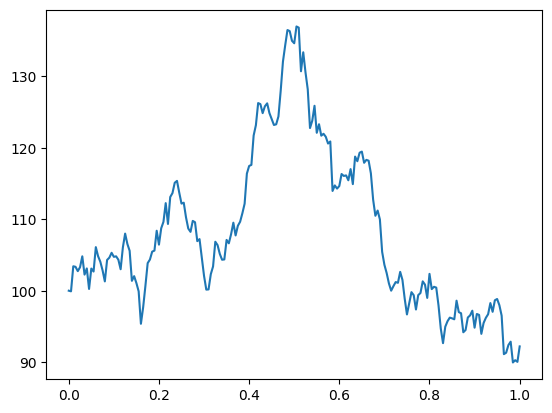

92.20205304589987

In [22]:
S.sample_path(T, plot=True)